In [1]:
import pandas as pd
import numpy as np
import time
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR


from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve 
from sklearn.utils import shuffle

In [8]:
df = pd.read_csv('DatasetPerovskitasJuan.csv') #Aqui lo que se hace es cargar los datos.

df1 = pd.read_csv('DatasetPerovskitasJuan1.csv') #Aqui lo que se hace es cargar los datos.
df1 = df1.dropna()
df1 = df1.drop_duplicates(subset=['full_formula'])
df1 = df1[df1['Nsites']<11]

df3 = pd.concat([df1, df], axis=0)
df3 = df3.drop_duplicates(subset=['full_formula'])

df3 = shuffle(df3, random_state=2)
x = df.drop('Unnamed: 0', axis = 1)
x = x.drop('ID', axis = 1)
x = x.drop('full_formula', axis = 1)
#x = x.drop('Energy', axis = 1)
x = x.drop('Energy_per_atom', axis = 1)
x = x.drop('Formation_energy_per_atom', axis = 1)
x = x.drop('E_above_hull', axis = 1)
x = x.drop("Band_gap",axis = 1) #Aqui quitamos la columna que correponde a la energia de gap
y = np.asarray(df['Formation_energy_per_atom']) #Aqui definimos la cantidad que deseamos predecir, en este caso la energia de gap
#x = (x-x.mean())/x.std()
#y = (y-y.mean())/y.std()
x = x.fillna(0)

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=9)

<function matplotlib.pyplot.show(close=None, block=None)>

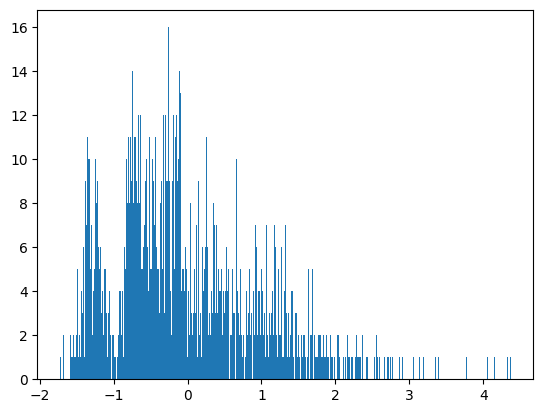

In [3]:
plt.hist(y, bins = 500)
plt.show

In [4]:
abr1 = GridSearchCV (AdaBoostRegressor (),{
    'random_state':[0,1,2], 'n_estimators':[1000], 'learning_rate':[0.001], 'loss': ['exponential']}, cv=5)
abr1.fit(X_train, y_train)
model = abr1.best_estimator_

Primero vemos las metricas
Model| R2 sq on train set: 0.6618
Model| R2 sq on test set: 0.6455
Model| MSE on test set: 0.3284
Model| MAE on test set: 0.4400
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

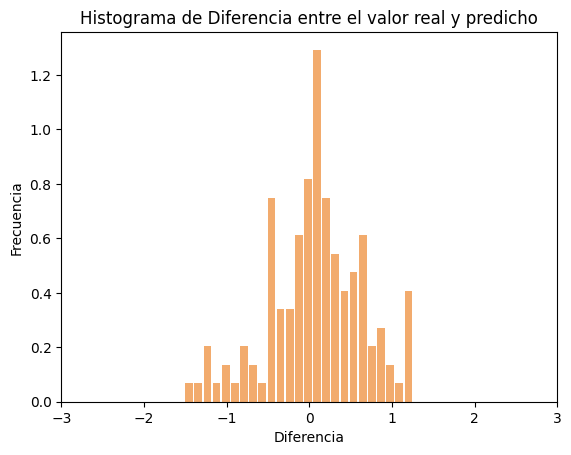

In [5]:
print('Primero vemos las metricas')
abr_score = model.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

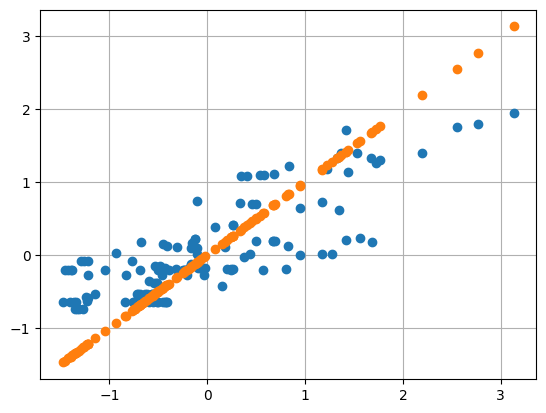

In [6]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [7]:
BR = GridSearchCV (linear_model.BayesianRidge(),{'tol':[1e-3]}, cv=5)
BR.fit(X_train, y_train) #Entrenamos el modelo
model1 = BR.best_estimator_ #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.7795
Model| R2 sq on test set: 0.7260
Model| MSE on test set: 0.2538
Model| MAE on test set: 0.3902
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

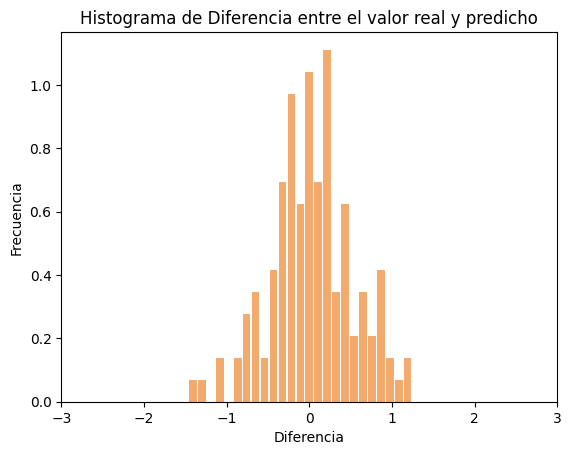

In [8]:
print('Primero vemos las metricas')
abr_score = model1.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model1.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model1.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

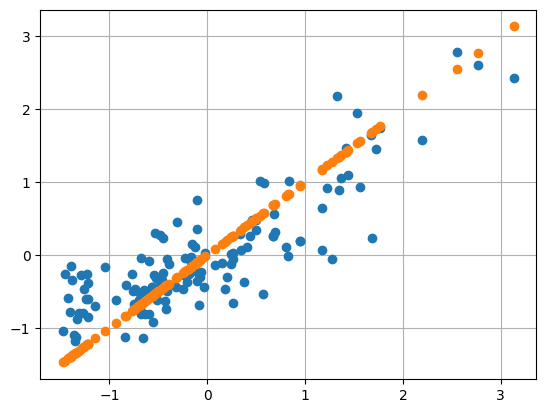

In [9]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [10]:
dtr1 = GridSearchCV (DecisionTreeRegressor(),{
    'criterion':['friedman_mse'], 'random_state':[0,1,2], 'splitter':['best'], 'max_depth':[None]}, cv=5, verbose = 3)
dtr1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model2 = dtr1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.743 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.729 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.768 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.585 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.705 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.760 total time=   0.0s
[CV 4/5] END

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.8238
Model| MSE on test set: 0.1633
Model| MAE on test set: 0.2102
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

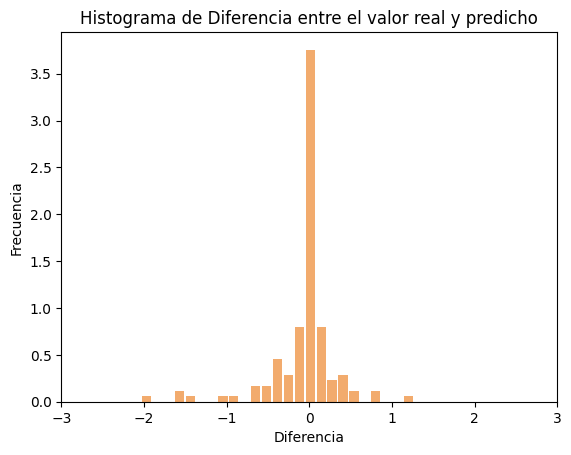

In [11]:
print('Primero vemos las metricas')
abr_score = model2.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model2.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model2.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

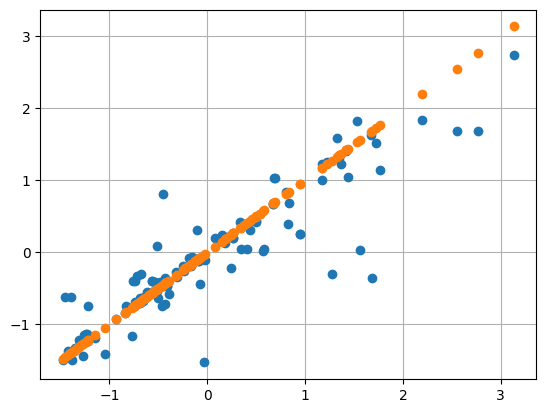

In [12]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [13]:
kernel = 15*RBF(1.0)+10*RBF(2.0)+5*RBF(3.0) #Definimos que tipo de kernel usar, en este caso uno contante de 15 y 2 tipo RBF
gpr1 = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel = kernel))
gpr1.fit(X_train, y_train) #Entrenamos el modelo
model3 = gpr1

c:\Users\Cronos\anaconda3\envs\kenai\lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.0511
Model| MSE on test set: 0.8790
Model| MAE on test set: 0.7297
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

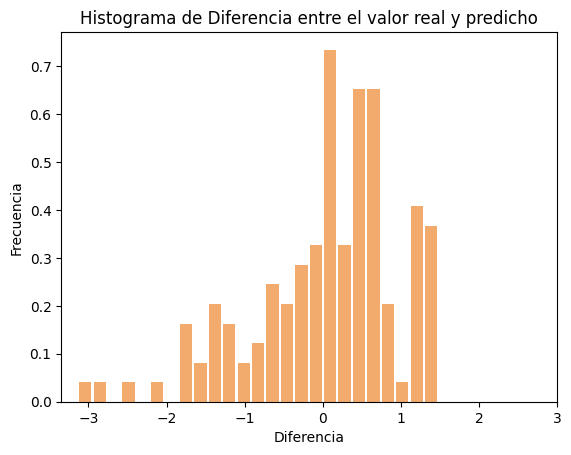

In [14]:
print('Primero vemos las metricas')
abr_score = model3.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model3.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model3.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

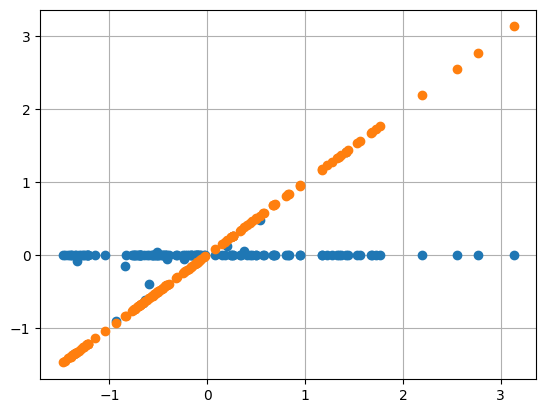

In [15]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [9]:
gbr = GridSearchCV(GradientBoostingRegressor (),{'n_estimators': [100,10,3], 'max_depth': [8], 'min_samples_split': [2], 'learning_rate': [0.1],
    'loss': ['squared_error'], 'random_state':[0,1,2]}, cv=5, verbose = 3)
#loss = 'ls', este es least squares
gbr.fit(X_train, y_train) #Entrenamos el modelo
model4 = gbr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.896 total time=   1.0s
[CV 2/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.906 total time=   1.0s
[CV 3/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.924 total time=   1.0s
[CV 4/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.793 total time=   1.0s
[CV 5/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.898 total time=   1.0s
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=1;, score=0.897 total time=   1.0s
[CV 2/5] END learning_rate=0

Primero vemos las metricas
Model| R2 sq on train set: 0.9999
Model| R2 sq on test set: 0.9401
Model| MSE on test set: 0.0470
Model| MAE on test set: 0.1205
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

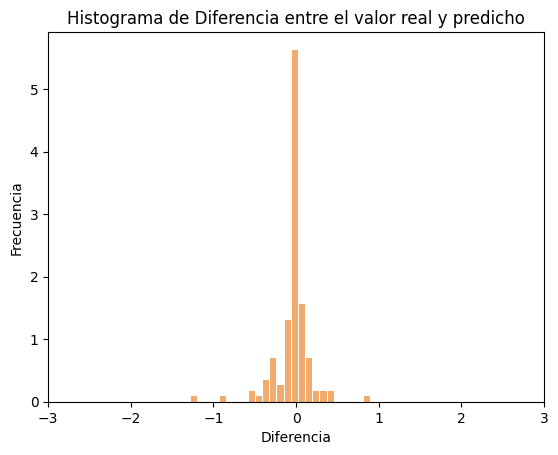

In [10]:
print('Primero vemos las metricas')
abr_score = model4.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model4.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model4.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

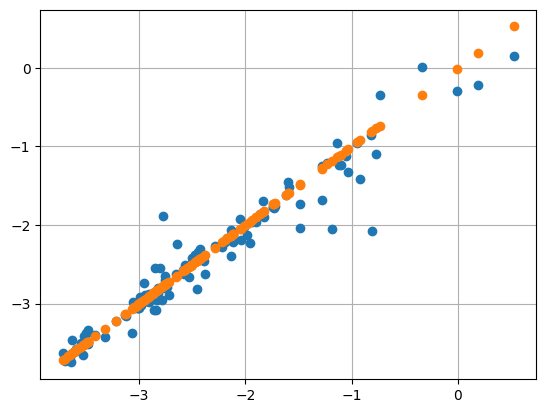

In [11]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [12]:
feature_importance = model4.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

In [13]:
for i in sorted_idx:
    print(X_train.columns[i], feature_importance[i])

X2 Block 0.0
X5 Block 0.0
X6 Group_Number 0.0
X3 Block 0.0
X4 Electronegativity 8.689685929788393e-10
X1 Block 1.276881588452e-09
Nelements 1.5315793423885972e-08
X6 Valence_Electrons 1.6150937832090833e-08
X5 Electron_Afinity 3.212894961797239e-08
X5 Ionization_Energy 8.647403227056418e-08
X4 Block 1.0216035723858743e-07
X5 Electronegativity 1.3214548293217476e-07
X6 Period_Number 2.2315407430594133e-07
X4 Z 2.584877539096248e-07
X6 Block 3.5220094801459643e-07
X4 Atomic_Weight 3.930687470206632e-07
X4 Group_Number 5.603884027899955e-07
X6 Density 7.150327239159371e-07
A Period_Number.1 9.699856697121614e-07
X5 Period_Number 1.3053642834246487e-06
X4 Valence_Electrons 1.6709042262355148e-06
X5 Covalent_radius 2.5512139014989885e-06
X6 Atomic_Weight 3.4759543959176794e-06
X6 Covalent_radius 5.478825561716836e-06
X5 Atomic_Weight 6.041911206478337e-06
A Group_Number.1 6.082630362443474e-06
X4 Period_Number 6.390658821357446e-06
X6 Z 6.604085520335357e-06
X4 Covalent_radius 7.89383740742

In [19]:
krr = GridSearchCV (KernelRidge (),{ 'alpha':[0.001],'kernel':['linear']}, cv=5,verbose=3)
krr.fit(X_train, y_train) #Entrenamos el modelo
model5 = krr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........alpha=0.001, kernel=linear;, score=0.779 total time=   0.0s
[CV 2/5] END ........alpha=0.001, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5] END ........alpha=0.001, kernel=linear;, score=0.696 total time=   0.0s
[CV 4/5] END ........alpha=0.001, kernel=linear;, score=0.760 total time=   0.0s
[CV 5/5] END ........alpha=0.001, kernel=linear;, score=0.249 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.7870
Model| R2 sq on test set: 0.7371
Model| MSE on test set: 0.2435
Model| MAE on test set: 0.3779
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

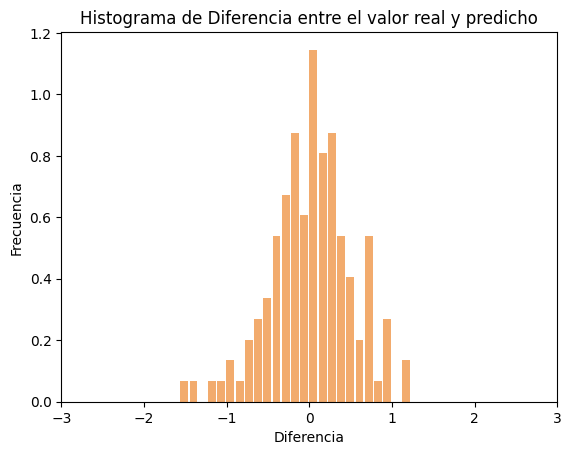

In [20]:
print('Primero vemos las metricas')
abr_score = model5.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model5.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model5.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

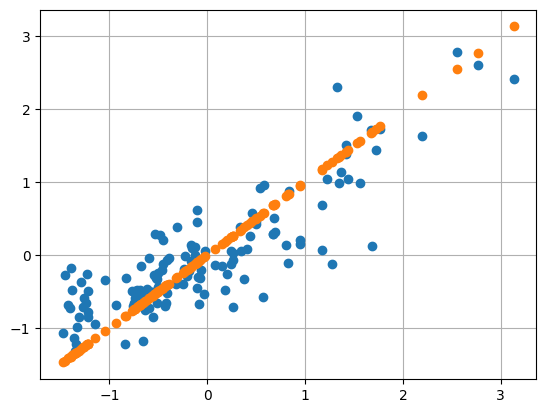

In [21]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [22]:
knr1 = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree')
knr1.fit(X_train, y_train)
model6 = knr1

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.7771
Model| MSE on test set: 0.2065
Model| MAE on test set: 0.2871
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

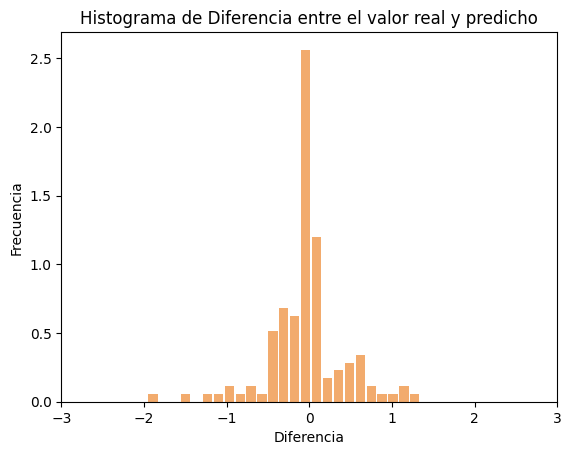

In [23]:
print('Primero vemos las metricas')
abr_score = model6.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model6.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model6.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

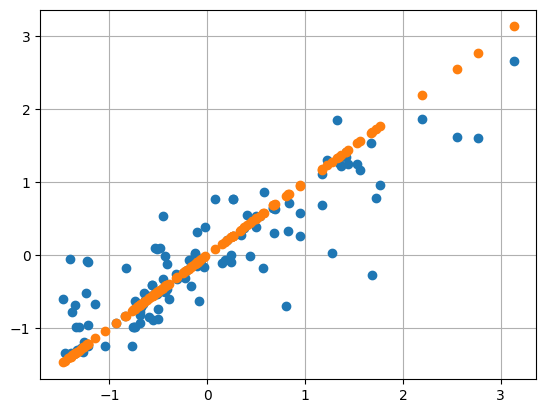

In [24]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [25]:
par = GridSearchCV (PassiveAggressiveRegressor(),{'max_iter':[1000], 'random_state':[10], 'tol':[1e-10]},
                   cv=5,verbose = 3)
#loss = 'ls', este es least squares
par.fit(X_train, y_train) #Entrenamos el modelo
model7 = par.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.278 total time=   0.0s
[CV 2/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.476 total time=   0.0s
[CV 3/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.594 total time=   0.0s
[CV 4/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.567 total time=   0.0s
[CV 5/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.456 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.6493
Model| R2 sq on test set: 0.6290
Model| MSE on test set: 0.3437
Model| MAE on test set: 0.4986
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

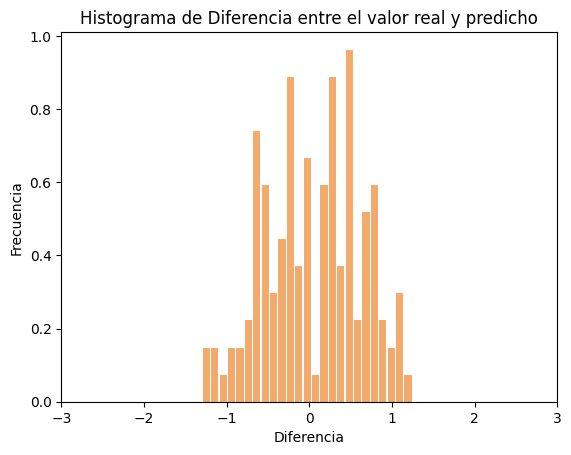

In [26]:
print('Primero vemos las metricas')
abr_score = model7.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model7.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model7.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

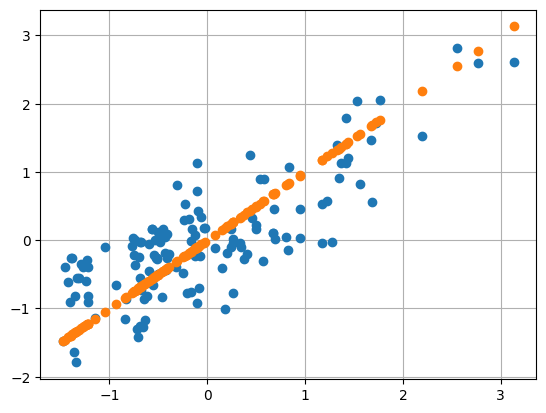

In [27]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [6]:
grid1 = GridSearchCV (RandomForestRegressor(),{'max_depth':[100], 'random_state':[0,1,2], 'criterion':['squared_error']
                                             }, cv=5, refit=True, verbose=3)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model8 = grid1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.835 total time=   1.1s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.880 total time=   1.2s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.840 total time=   1.1s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.745 total time=   1.1s
[CV 5/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.864 total time=   1.1s
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.834 total time=   1.1s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.881 total time=   1.1s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.827 total time=   1.1s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.755 total time=   1.1s
[CV 5/5] END criterion=squared_

Primero vemos las metricas
Model| R2 sq on train set: 0.9775
Model| R2 sq on test set: 0.8975
Model| MSE on test set: 0.0805
Model| MAE on test set: 0.1708
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

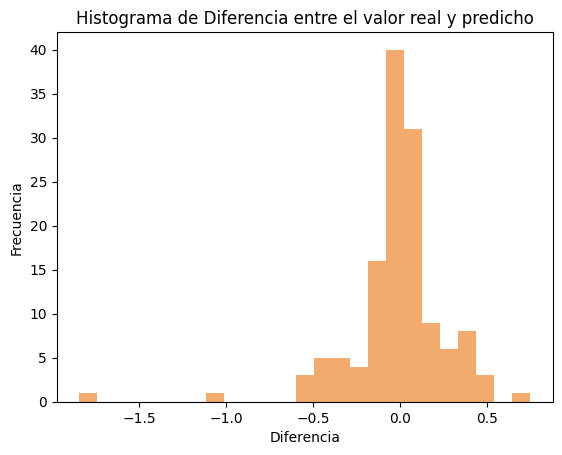

In [7]:
print('Primero vemos las metricas')
abr_score = model8.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model8.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model8.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D')
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
#plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

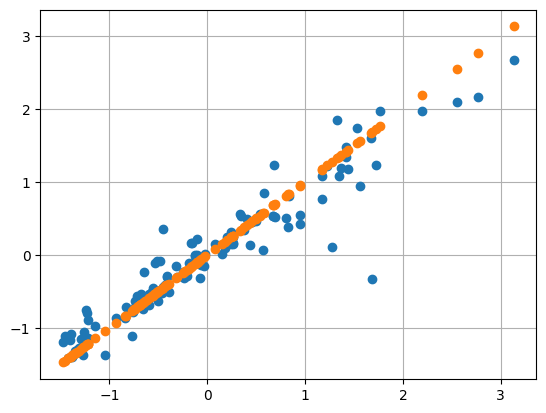

In [30]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

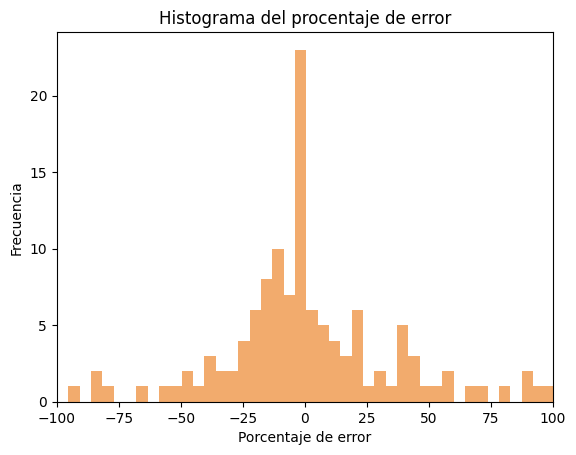

In [40]:
dif1 = (abs(yt - yp) / yt)*100
plt.hist(x=dif1, bins=100, color='#F2AB6D')
plt.title('Histograma del procentaje de error')
plt.xlabel('Porcentaje de error')
plt.ylabel('Frecuencia')
plt.xlim(-100,100)
#plt.xticks(range(-100,101,10))
plt.show

In [31]:
sgd = (make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000,tol=1e-1500,alpha=0.0001,epsilon=0.0001)))
sgd.fit(X_train, y_train) #Entrenamos el modelo
model9 = sgd #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.3033
Model| R2 sq on test set: 0.6751
Model| MSE on test set: 0.3009
Model| MAE on test set: 0.4246
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

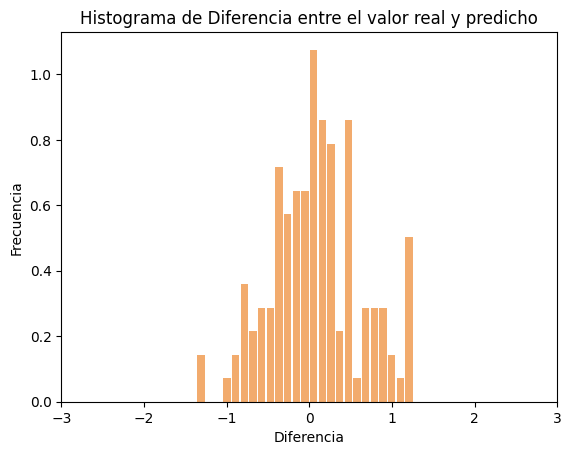

In [32]:
print('Primero vemos las metricas')
abr_score = model9.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model9.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model9.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

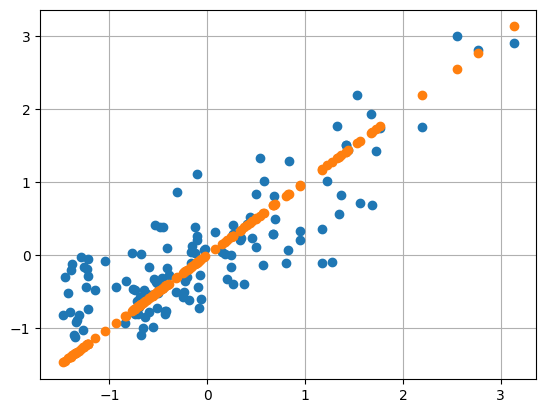

In [33]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [34]:
steps1 = [('scaler', StandardScaler()), ('SVM', SVR())]
pipeline1 = Pipeline(steps1) 
grid1 = GridSearchCV(pipeline1, param_grid= {'SVM__C':[100], 'SVM__gamma':['auto'], 'SVM__kernel': ['rbf'],
                                           'SVM__epsilon':[0.001]},cv = 5, refit=True,verbose=3, n_jobs = -1)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model10 = grid1.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Primero vemos las metricas
Model| R2 sq on train set: 0.9549
Model| R2 sq on test set: 0.8868
Model| MSE on test set: 0.1049
Model| MAE on test set: 0.1787
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

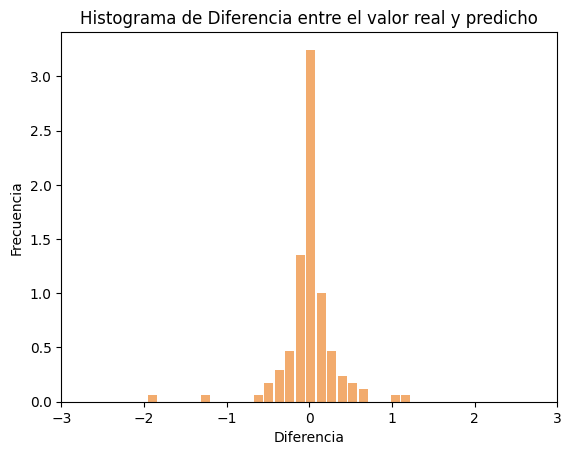

In [35]:
print('Primero vemos las metricas')
abr_score = model10.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model10.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model10.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

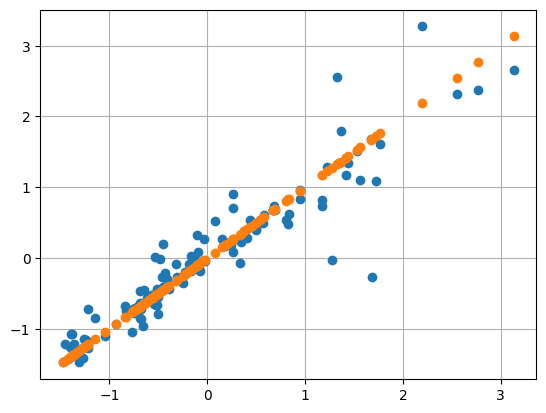

In [36]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show